# Happiness Dataset

[Daily Happiness & Employee Turnover](https://www.kaggle.com/harriken/employeeturnover?select=churn.csv)
- churn.csv
- commentInteractions.csv
- comments_clean_anonimized.csv
- votes.csv

In [1]:
import numpy as np
import pandas as pd
# churn.csv
churn_df = pd.read_csv("./data/churn.csv")
churn_df.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True


In [2]:
# commentInteractions.csv
ci_df = pd.read_csv("./data/commentInteractions.csv", dtype={2: object, 3: object})
ci_df.head()

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,true,false,58d0179ae010990004e3806d


In [3]:
# comments_clean_anonymized.csv
cca_df = pd.read_csv("./data/comments_clean_anonymized.csv")
cca_df.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017


In [4]:
# votes
votes_df = pd.read_csv("./data/votes.csv")
votes_df.head()

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2


### Data cleaning

In [5]:
# Check shape and type
print("====== churn_df ======")
print(churn_df.shape)
print(churn_df.dtypes)
churn_df.describe()

====== churn_df ======
(4847, 5)
employee                  int64
companyAlias             object
numVotes                  int64
lastParticipationDate    object
stillExists                bool
dtype: object


,employee,numVotes
count,4847.000000,4847.000000
mean,167.375490,45.896431
std,208.271041,71.302128
min,-218.000000,0.000000
25%,33.000000,3.000000
50%,113.000000,16.000000
75%,231.000000,59.000000
max,999.000000,740.000000


In [6]:
print("====== ci_df ======")
print(ci_df.shape)
print(ci_df.dtypes)
ci_df.describe()

====== ci_df ======
(336960, 5)
employee         int64
companyAlias    object
liked           object
disliked        object
commentId       object
dtype: object


,employee
count,336960.000000
mean,162.879475
std,182.069656
min,-218.000000
25%,38.000000
50%,122.000000
75%,212.000000
max,999.000000


In [7]:
# drop null values
ci_df = ci_df.dropna()
print(ci_df.shape)

# Convert "like", "dislike" columns to bool
ci_df["liked"] = (ci_df["liked"] == "true") * 1
ci_df["disliked"] = (ci_df["disliked"] == "true") * 1
print(ci_df.dtypes)
ci_df.head()

(336959, 5)
employee         int64
companyAlias    object
liked            int64
disliked         int64
commentId       object
dtype: object


,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,1,0,58d0179ae010990004e3806d


In [8]:
print("====== cca_df ======")
print(cca_df.shape)
print(cca_df.dtypes)
cca_df.describe()

====== cca_df ======
(82756, 7)
employee          int64
companyAlias     object
commentId        object
txt              object
likes           float64
dislikes        float64
commentDate      object
dtype: object


,employee,likes,dislikes
count,82756.000000,82755.000000,82755.000000
mean,135.108427,6.873107,1.270534
std,161.530227,7.704659,2.715937
min,-217.000000,0.000000,0.000000
25%,29.000000,2.000000,0.000000
50%,102.000000,4.000000,0.000000
75%,197.000000,9.000000,1.000000
max,999.000000,86.000000,53.000000


In [9]:
print("====== votes_df ======")
print(votes_df.shape)
print(votes_df.dtypes)
votes_df.describe()

====== votes_df ======
(221232, 4)
employee         int64
companyAlias    object
voteDate        object
vote             int64
dtype: object


,employee,vote
count,221232.000000,221232.000000
mean,172.119562,2.861530
std,172.723491,0.986078
min,1.000000,1.000000
25%,50.000000,2.000000
50%,127.000000,3.000000
75%,222.000000,4.000000
max,999.000000,4.000000


## Descriptive Analysis

,employee,numVotes
count,4847.000000,4847.000000
mean,167.375490,45.896431
std,208.271041,71.302128
min,-218.000000,0.000000
25%,33.000000,3.000000
50%,113.000000,16.000000
75%,231.000000,59.000000
max,999.000000,740.000000


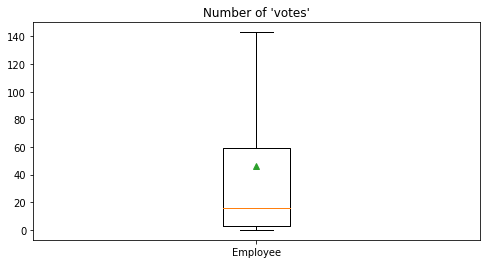

In [10]:
import matplotlib
from matplotlib import pyplot as plt
import math
# Number of votes distribution for all employees
existing_employees = churn_df[churn_df['employee'] >= 0]
churned_employees = churn_df[churn_df['employee'] < 0]

plt.figure(figsize=(8, 4))
plt.boxplot([churn_df["numVotes"]], 
            showfliers=False, showmeans=True)
plt.xticks([1], ["Employee"])
plt.title("Number of 'votes'")

churn_df.describe()

(array([3.417e+03, 5.750e+02, 2.470e+02, 1.110e+02, 3.900e+01, 1.200e+01,
        1.200e+01, 2.000e+00, 0.000e+00, 3.000e+00]),
 array([  0.,  74., 148., 222., 296., 370., 444., 518., 592., 666., 740.]),
 <BarContainer object of 10 artists>)

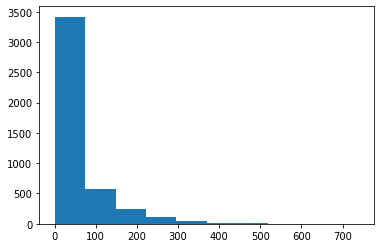

In [11]:
existing_employees = churn_df[churn_df['employee'] >= 0]
# Number of votes distribution for existing employees
plt.hist(existing_employees['numVotes'])


In [12]:
churned_employees = churn_df[churn_df['employee'] < 0]
# Number of votes distribution for churned employees
churned_employees.describe()

,employee,numVotes
count,429.000000,429.0
mean,-73.370629,0.0
std,62.181677,0.0
min,-218.000000,0.0
25%,-112.000000,0.0
50%,-56.000000,0.0
75%,-18.000000,0.0
max,-2.000000,0.0


^# NumVotes for churned_employees are all 0s...

In [13]:
# Calculate the number of comments each employee left
# TODO: use last participation date to get the date range
cca_df['commentDate'] = pd.to_datetime(cca_df['commentDate']).dt.normalize()
cca_df['commentLength'] = cca_df['txt'].str.len()

churn_df["lastParticipationDate"] = pd.to_datetime(churn_df["lastParticipationDate"]).dt.normalize()
merged = pd.merge(churn_df, cca_df, on=["employee", "companyAlias"], how="inner")

# Calculate the range of the date. 
count = merged.groupby(["employee", "lastParticipationDate"]).agg({"commentId": "count", 
                                          "likes": "sum", 
                                          "dislikes": "sum", 
                                          "commentLength": "mean",
                                          "commentDate": "min"}).reset_index()

count["dateRange"] = (count["lastParticipationDate"] - count["commentDate"]).dt.days + 1
count
count["commentPerDay"] = count["commentId"]/ count["dateRange"]
count["likesPerDay"] = count["likes"] / count["dateRange"]
count["dislikesPerDay"] = count["dislikes"] / count["dateRange"]
count = count.reset_index()
churn_count = count[count["employee"] < 0]
nonchurn_count = count[count["employee"] >= 0]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [14]:
churn_count.describe()

,index,employee,commentId,likes,dislikes,commentLength,dateRange,commentPerDay,likesPerDay,dislikesPerDay
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,147.500000,-71.780405,16.243243,77.878378,13.425676,65.428721,67.628378,0.791811,3.161337,0.947510
std,85.592056,64.047618,22.563694,170.308530,28.640162,59.292040,86.108546,0.839232,5.350657,3.837396
min,0.000000,-217.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.014151,0.000000,0.000000
25%,73.750000,-113.000000,2.000000,6.000000,0.000000,25.107143,4.000000,0.142576,0.225367,0.000000
50%,147.500000,-50.500000,8.000000,18.000000,2.000000,43.900000,35.500000,0.423032,0.932868,0.037560
75%,221.250000,-15.000000,16.000000,62.500000,10.000000,88.166667,103.250000,1.333333,4.000000,0.409459
max,295.000000,-2.000000,122.000000,1154.000000,196.000000,327.000000,462.000000,6.000000,36.000000,42.000000


Average posts for churned and non-churned users are around the same.

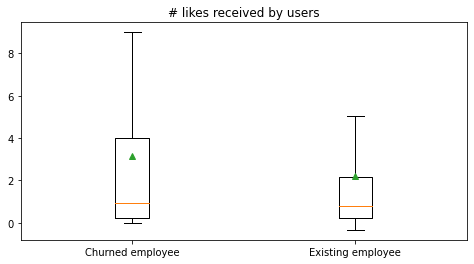

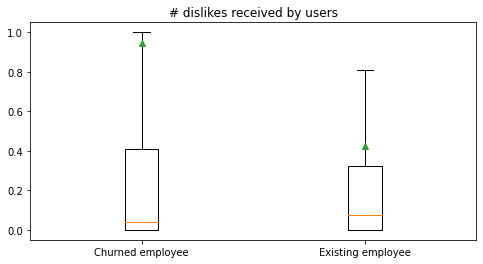

,index,employee,commentId,likes,dislikes,commentLength,dateRange,commentPerDay,likesPerDay,dislikesPerDay
count,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000
mean,1541.500000,183.742777,31.295345,219.085072,40.615169,87.183504,156.152889,0.425181,2.223508,0.423317
std,719.522759,190.385915,59.381188,500.281742,110.215850,75.052357,154.704794,0.696888,4.379425,1.518849
min,296.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-35.000000,-0.085714,-0.342857,-0.657143
25%,918.750000,48.000000,4.000000,14.000000,0.000000,38.303571,28.000000,0.068966,0.228065,0.000000
50%,1541.500000,129.000000,12.000000,58.000000,8.000000,67.302579,122.000000,0.175524,0.765781,0.075236
75%,2164.250000,246.250000,34.000000,198.000000,34.000000,110.440789,240.000000,0.445098,2.152255,0.322860
max,2787.000000,999.000000,808.000000,6558.000000,1940.000000,672.000000,771.000000,10.000000,57.000000,54.000000


In [15]:
# boxplot
plt.figure(figsize=(8, 4))
plt.boxplot([churn_count["likesPerDay"], 
             nonchurn_count["likesPerDay"]], showfliers=False, showmeans=True)
plt.xticks([1, 2], ["Churned employee", "Existing employee"])
plt.title("# likes received by users")
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot([churn_count["dislikesPerDay"], 
             nonchurn_count["dislikesPerDay"]], showfliers=False, showmeans=True)
plt.xticks([1, 2], ["Churned employee", "Existing employee"])
plt.title("# dislikes received by users")
plt.show()

nonchurn_count.describe()

In [16]:
churn_count.describe()


,index,employee,commentId,likes,dislikes,commentLength,dateRange,commentPerDay,likesPerDay,dislikesPerDay
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,147.500000,-71.780405,16.243243,77.878378,13.425676,65.428721,67.628378,0.791811,3.161337,0.947510
std,85.592056,64.047618,22.563694,170.308530,28.640162,59.292040,86.108546,0.839232,5.350657,3.837396
min,0.000000,-217.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.014151,0.000000,0.000000
25%,73.750000,-113.000000,2.000000,6.000000,0.000000,25.107143,4.000000,0.142576,0.225367,0.000000
50%,147.500000,-50.500000,8.000000,18.000000,2.000000,43.900000,35.500000,0.423032,0.932868,0.037560
75%,221.250000,-15.000000,16.000000,62.500000,10.000000,88.166667,103.250000,1.333333,4.000000,0.409459
max,295.000000,-2.000000,122.000000,1154.000000,196.000000,327.000000,462.000000,6.000000,36.000000,42.000000


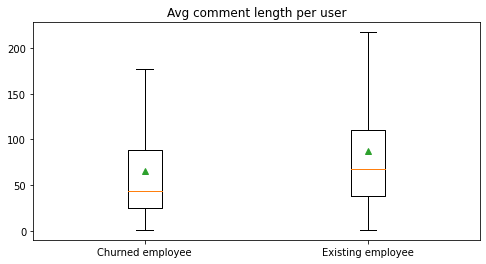

Avg comment length nonchurned users received:  87.18350377553486
Avg comment length churned users received:  65.42872139314312


In [17]:
# Avg post lengths
plt.figure(figsize=(8, 4))
plt.boxplot([churn_count["commentLength"], 
             nonchurn_count["commentLength"]], showfliers=False, showmeans=True)
plt.xticks([1, 2], ["Churned employee", "Existing employee"])
plt.title("Avg comment length per user")
plt.show()

print("Avg comment length nonchurned users received: ", nonchurn_count['commentLength'].mean())
print("Avg comment length churned users received: ", churn_count['commentLength'].mean())

Avg comment length for existing employees is longer. 

In [18]:
# Join the tables
votes_joined = pd.merge(churn_df, votes_df, on=["employee", "companyAlias"], how="inner")
votes_joined

,employee,companyAlias,numVotes,lastParticipationDate,stillExists,voteDate,vote
0,512,56aec740f1ef260003e307d6,4,2017-02-23,True,Tue Jan 17 01:00:00 CET 2017,3
1,512,56aec740f1ef260003e307d6,4,2017-02-23,True,Mon Jan 23 01:00:00 CET 2017,2
2,512,56aec740f1ef260003e307d6,4,2017-02-23,True,Tue Feb 21 01:00:00 CET 2017,1
3,512,56aec740f1ef260003e307d6,4,2017-02-23,True,Thu Feb 23 01:00:00 CET 2017,4
4,2,56aec740f1ef260003e307d6,72,2017-03-17,True,Fri Feb 05 01:00:00 CET 2016,2
...,...,...,...,...,...,...,...
222965,17,573a0671b5ec330003add34a,7,2016-06-28,True,Fri Jun 03 02:00:00 CEST 2016,3
222966,17,573a0671b5ec330003add34a,7,2016-06-28,True,Tue Jun 07 02:00:00 CEST 2016,4
222967,17,573a0671b5ec330003add34a,7,2016-06-28,True,Mon Jun 13 02:00:00 CEST 2016,4
222968,17,573a0671b5ec330003add34a,7,2016-06-28,True,Tue Jun 28 02:00:00 CEST 2016,4


In [19]:
votes_joined.describe()

,employee,numVotes,vote
count,222970.000000,222970.000000,222970.000000
mean,173.087752,156.286281,2.859990
std,173.466417,123.955314,0.987699
min,1.000000,0.000000,1.000000
25%,50.000000,65.000000,2.000000
50%,127.000000,130.000000,3.000000
75%,225.000000,218.000000,4.000000
max,999.000000,740.000000,4.000000


Text(0, 0.5, '# users')

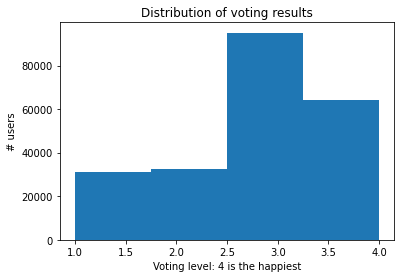

In [20]:
plt.hist(votes_joined['vote'], bins=4)
plt.title("Distribution of voting results")
plt.xlabel("Voting level: 4 is the happiest")
plt.ylabel("# users")

Challenge: No vote data for churned employees...